In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge

sns.set()

# California Housing

Este es un popular [dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) que vamos a estar leyendo desde **Scikit-Learn**.

Se requiere construir una regresión que nos permita predecir el valor de valor medio de casas en distritos de California (medidos en ciento de miles de dólares $100.000). Este dataset deriva del censo de 1990 de EEUU, donde cada observación es un bloque. Un bloque es la unidad geográfica más pequeña para la cual la Oficina del Censo de EE. UU. publica datos de muestra (un bloque típicamente tiene una población de 600 a 3,000 personas).

Un hogar es un grupo de personas que residen dentro de una casa. Dado que el número promedio de habitaciones y dormitorios en este conjunto de datos se proporciona por hogar, estas columnas pueden tomar valores grandes para grupos de bloques con pocos hogares y muchas casas vacías.

Los atributos en el orden que se guardaron en el dataset son:

- `MedInc`: Ingreso medio en el bloque
- `HouseAge`: Edad mediana de las casas en el bloque
- `AveRooms`: Número promedio de habitaciones por hogar.
- `AveBedrms`: Número promedio de dormitorios por hogar.
- `Population`: Población del bloque
- `AveOccup`: Número promedio de miembros por hogar.
- `Latitude`: Latitud del bloque
- `Longitude`: Longitud del bloque

In [2]:
# Leemos el dataset
california_housing = fetch_california_housing()

# Y obtenemos los atributos y target
X = california_housing.data
y = california_housing.target

# Transformamos en Pandas
X = pd.DataFrame(X, columns=california_housing['feature_names'])
y = pd.Series(y, name=california_housing['target_names'][0])

# Unimos a X e y, esto ayuda a la parte de la gráfica del mapa de calor de correlación
df_california = pd.concat([X, y], axis=1)

In [3]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [5]:
df_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Vamos a entender un poco mejor el dataset

In [6]:
df_california.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [7]:
df_california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Parecen haber datos que están muy lejos de los valores medios y esten generando un ruido muy importante, para eso vamos a filtrar y quitar todos los datos que esten a más de 5 desviaciones estándar.

In [ ]:
# Calcular la media y la desviación estándar de cada columna
mean = df_california.mean()
std_dev = df_california.std()

# Definir el límite superior e inferior basado en 5 desviaciones estándar
upper_limit = mean + 5 * std_dev
lower_limit = mean - 5 * std_dev

# Filtrar los datos que están fuera de los límites
filtered_data = df_california[(df_california < upper_limit) & (df_california > lower_limit)]
df = filtered_data.dropna()
df.info()

# Me quedo solo con los outliers
outliers = df_california[(df_california > upper_limit) & (df_california < lower_limit)]
df_outliers = outliers.dropna()
df_outliers.info()

In [9]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20358.000000,20358.000000,20358.000000,20358.000000,20358.000000,20358.000000,20358.000000,20358.000000,20358.000000
mean,3.831662,28.758522,5.305879,1.074033,1387.147510,2.939248,35.628456,-119.574932,2.060390
std,1.797640,12.516694,1.340986,0.167121,929.140546,0.997378,2.134207,2.005215,1.146072
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,32.540000,-124.350000,0.149990
25%,2.559575,18.000000,4.433638,1.005702,791.000000,2.429252,33.930000,-121.800000,1.192000
50%,3.525550,29.000000,5.214773,1.048271,1166.500000,2.818693,34.250000,-118.490000,1.794000
75%,4.724875,37.000000,6.019740,1.098561,1717.750000,3.283165,37.710000,-118.010000,2.640000
max,13.367000,52.000000,17.500000,3.427374,7087.000000,51.400000,41.950000,-114.310000,5.000010


Le saque casi 300 datos que considero que son ruido, vamos a seguir estudiando con este df filtrado y con el original para ver cómo dan los resultados

---------------------------------------------------------


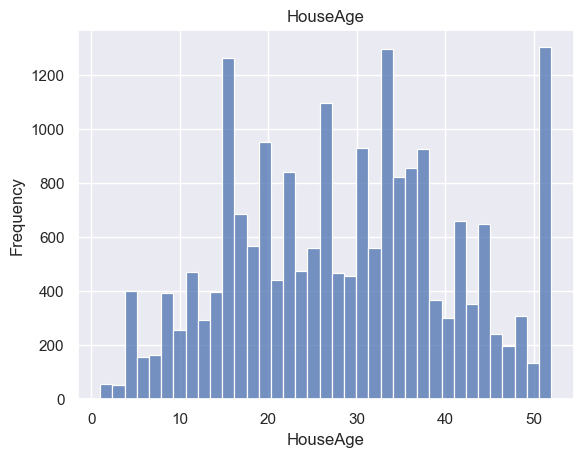

---------------------------------------------------------


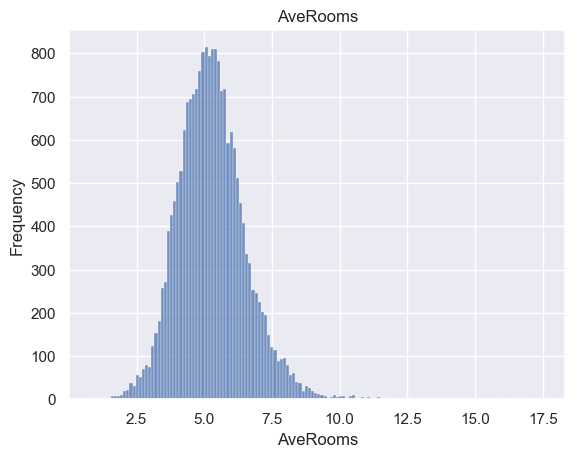

---------------------------------------------------------


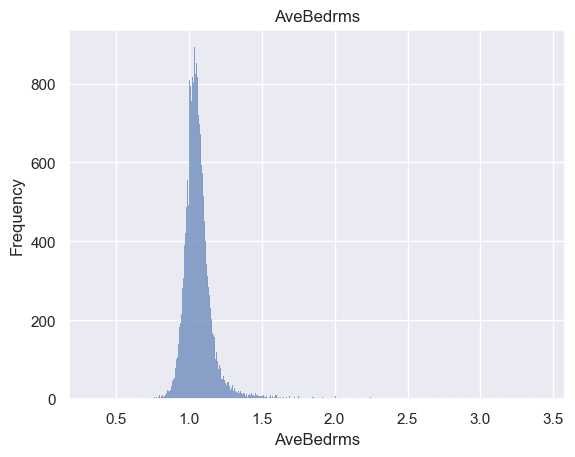

---------------------------------------------------------


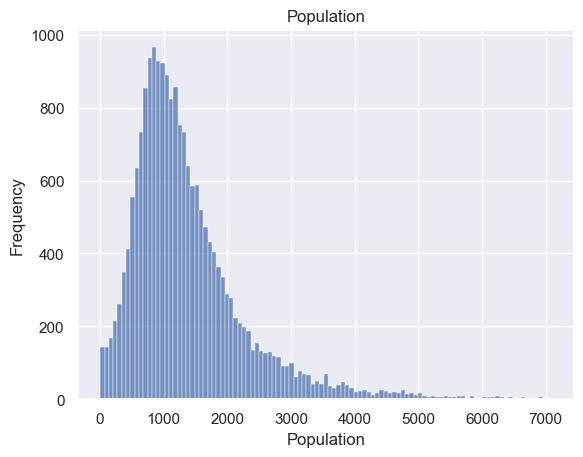

---------------------------------------------------------


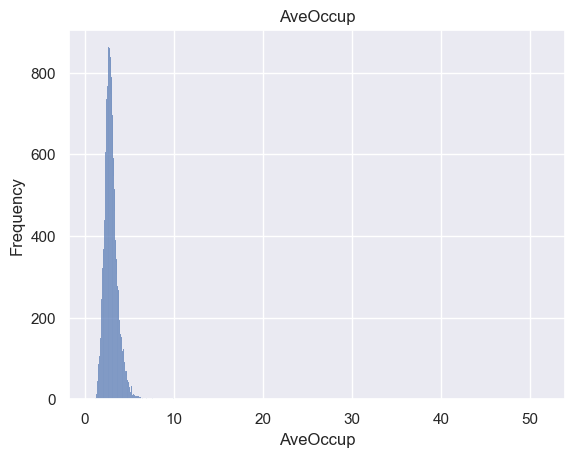

---------------------------------------------------------


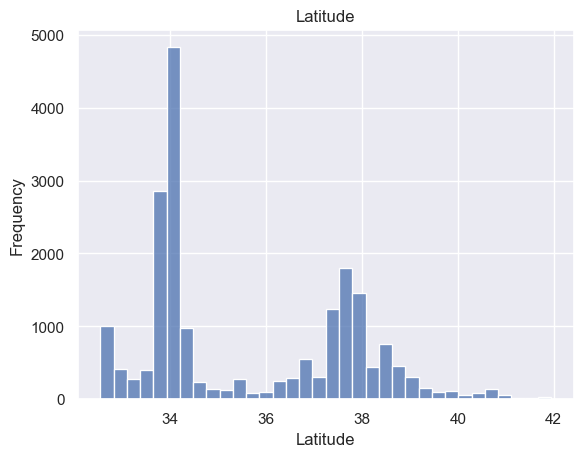

---------------------------------------------------------


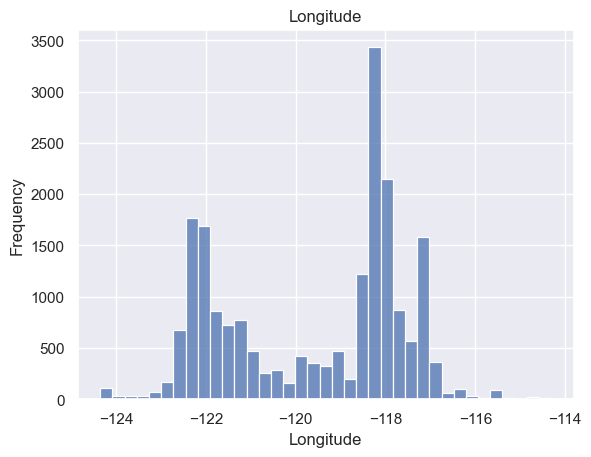

---------------------------------------------------------


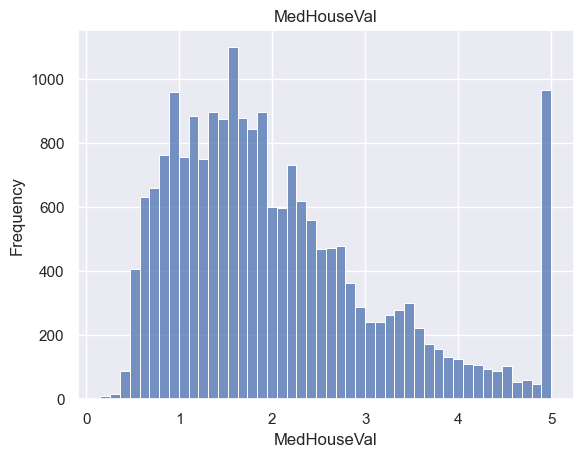

In [10]:
num_data = df.columns[1:]

for column in num_data:
    print("---------------------------------------------------------")
    plt.figure()
    sns.histplot(df[column])  # Plotting histogram for the current column
    plt.title(column)  # Setting the title of the histogram to the column name
    plt.xlabel(column)  # Setting the x-axis label to the column name
    plt.ylabel("Frequency")  # Setting the y-axis label
    plt.show()  # Displaying the histogram

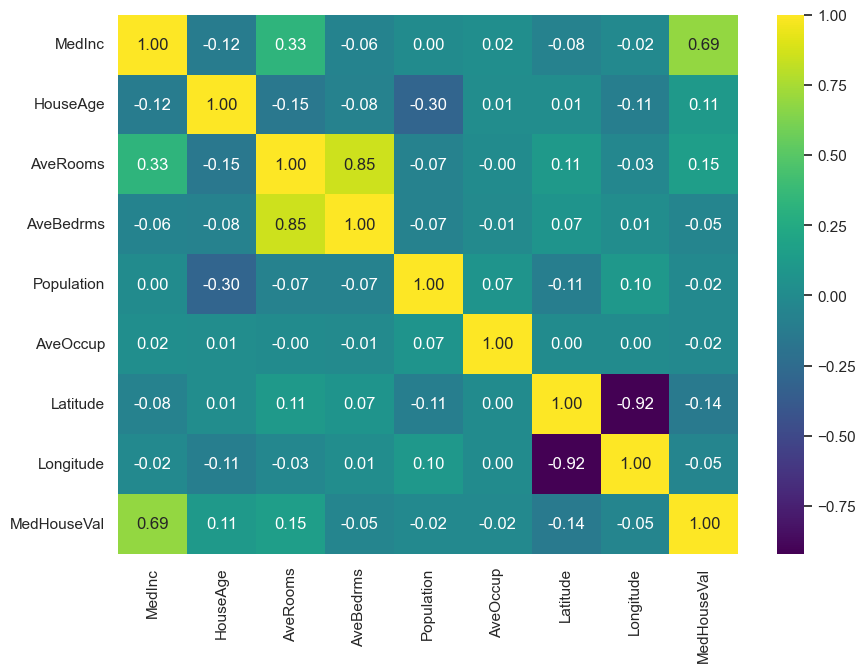

In [11]:
# Podemos ver cuál es la relación entre variables, recordemos, es mejor con la variable objetivo, pero malo si es entre variables de entrada....
plt.figure(figsize=(10, 7))
correlacion_profit = df_california.corr().round(2)
sns.heatmap(data=correlacion_profit, annot=True, cmap='viridis', fmt=".2f")
plt.show()

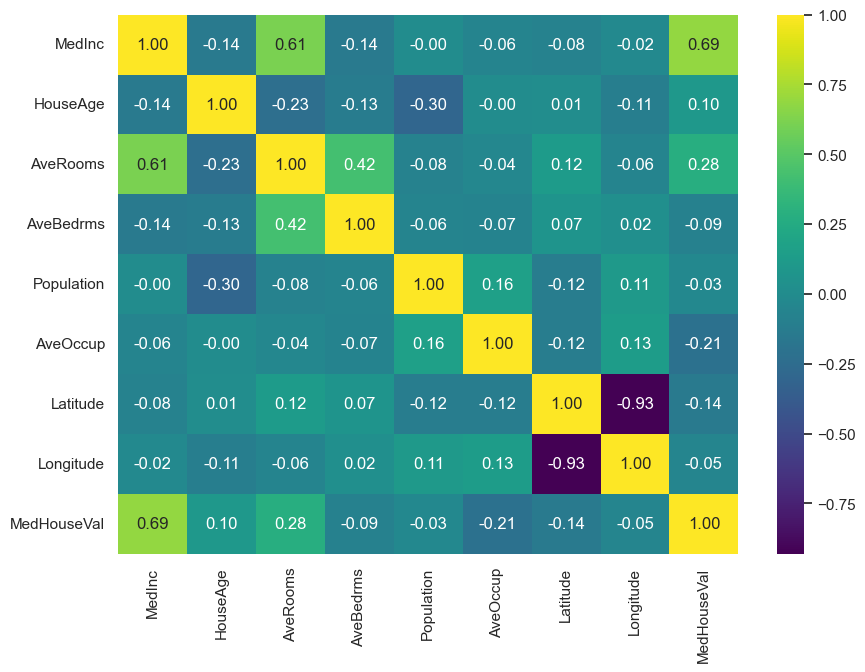

In [12]:
# Podemos ver cuál es la relación entre variables, recordemos, es mejor con la variable objetivo, pero malo si es entre variables de entrada....
plt.figure(figsize=(10, 7))
correlacion_profit = df.corr().round(2)
sns.heatmap(data=correlacion_profit, annot=True, cmap='viridis', fmt=".2f")
plt.show()

Con el dataset original parece que el único dato que 

C:\Users\magui\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\magui\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


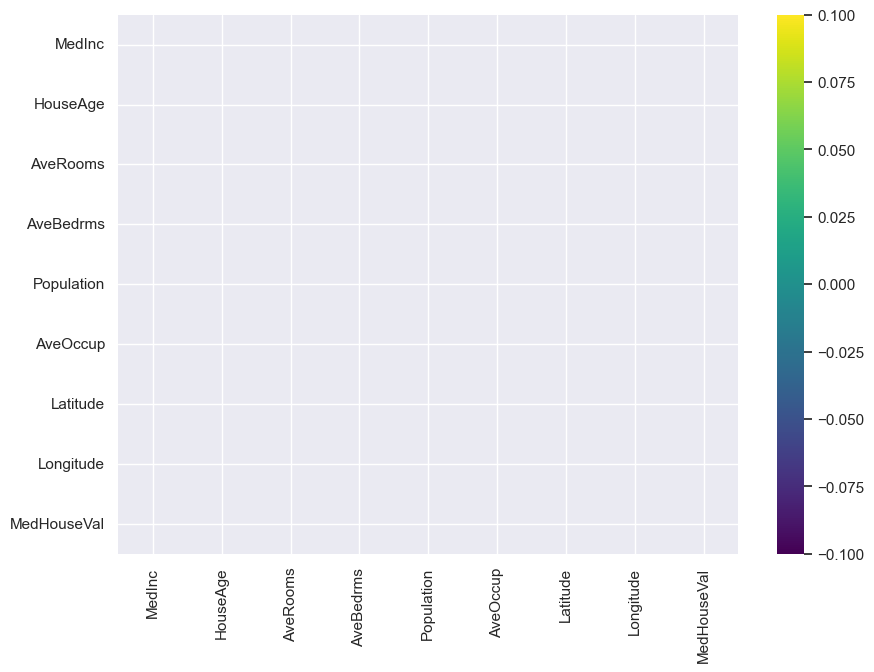

In [13]:
# Podemos ver cuál es la relación entre variables, recordemos, es mejor con la variable objetivo, pero malo si es entre variables de entrada....
plt.figure(figsize=(10, 7))
correlacion_profit = df_outliers.corr().round(2)
sns.heatmap(data=correlacion_profit, annot=True, cmap='viridis', fmt=".2f")
plt.show()

C:\Users\magui\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


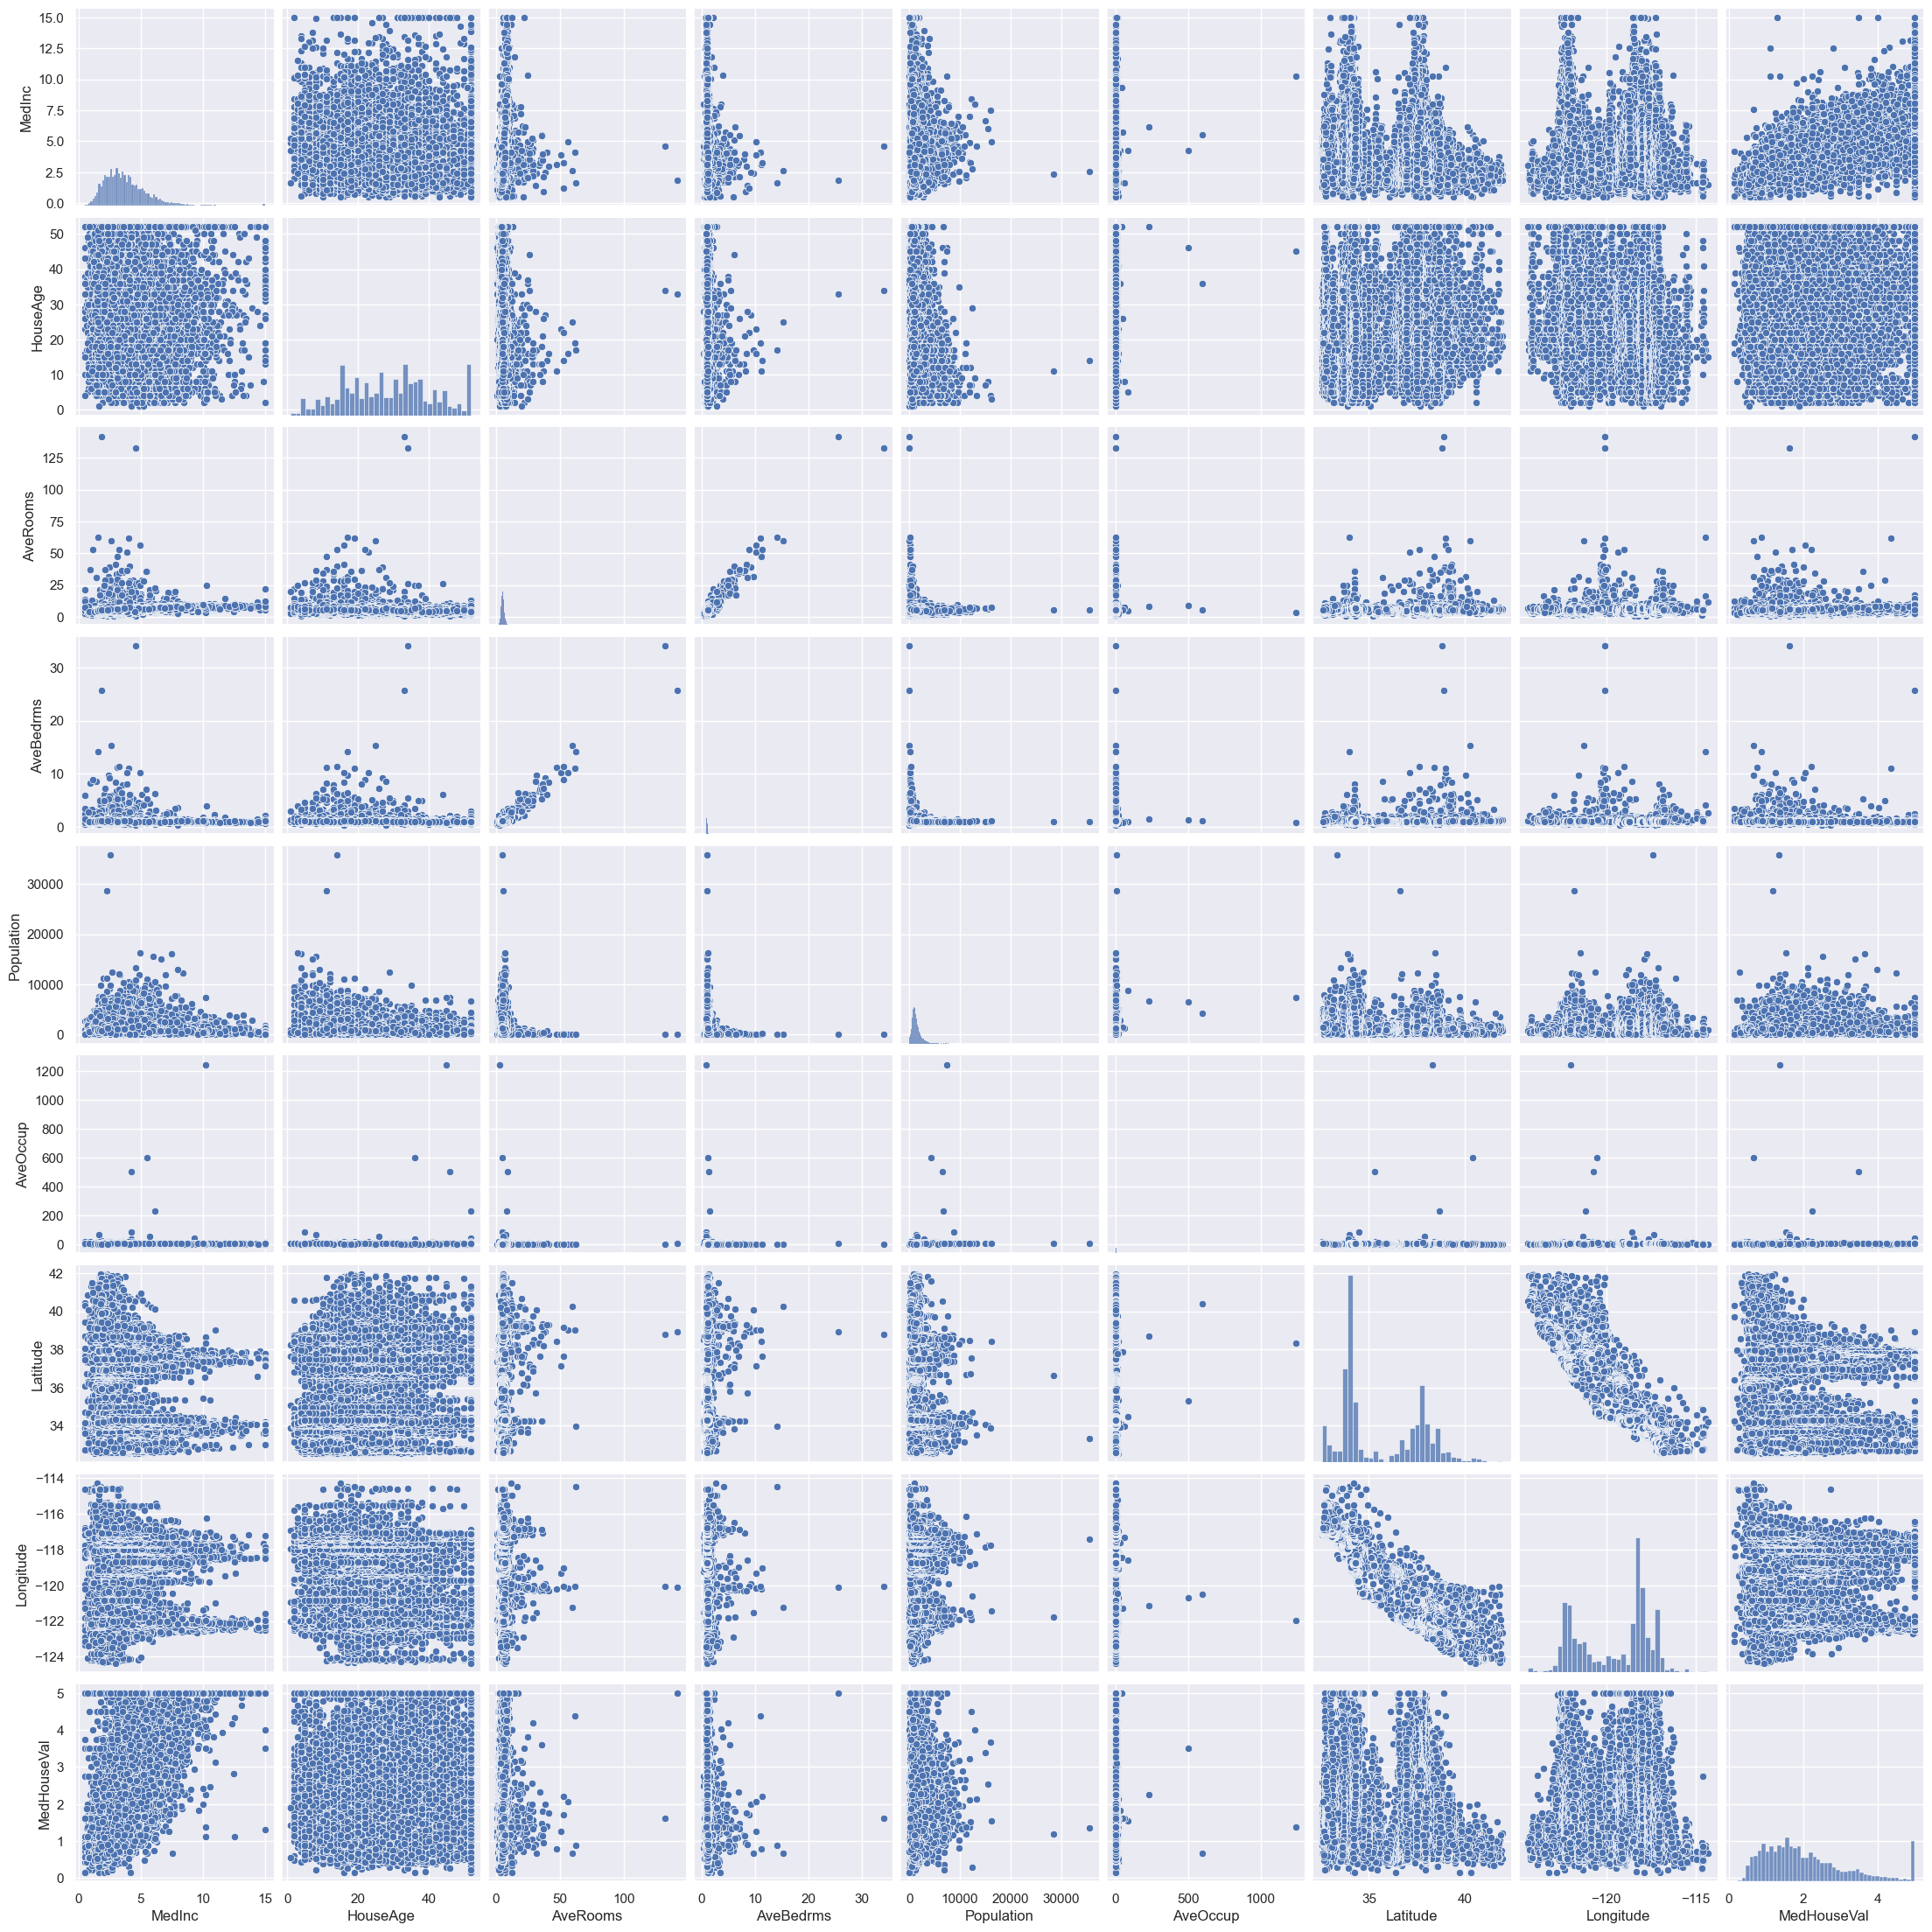

In [14]:
sns.pairplot(data=df_california);


KeyboardInterrupt



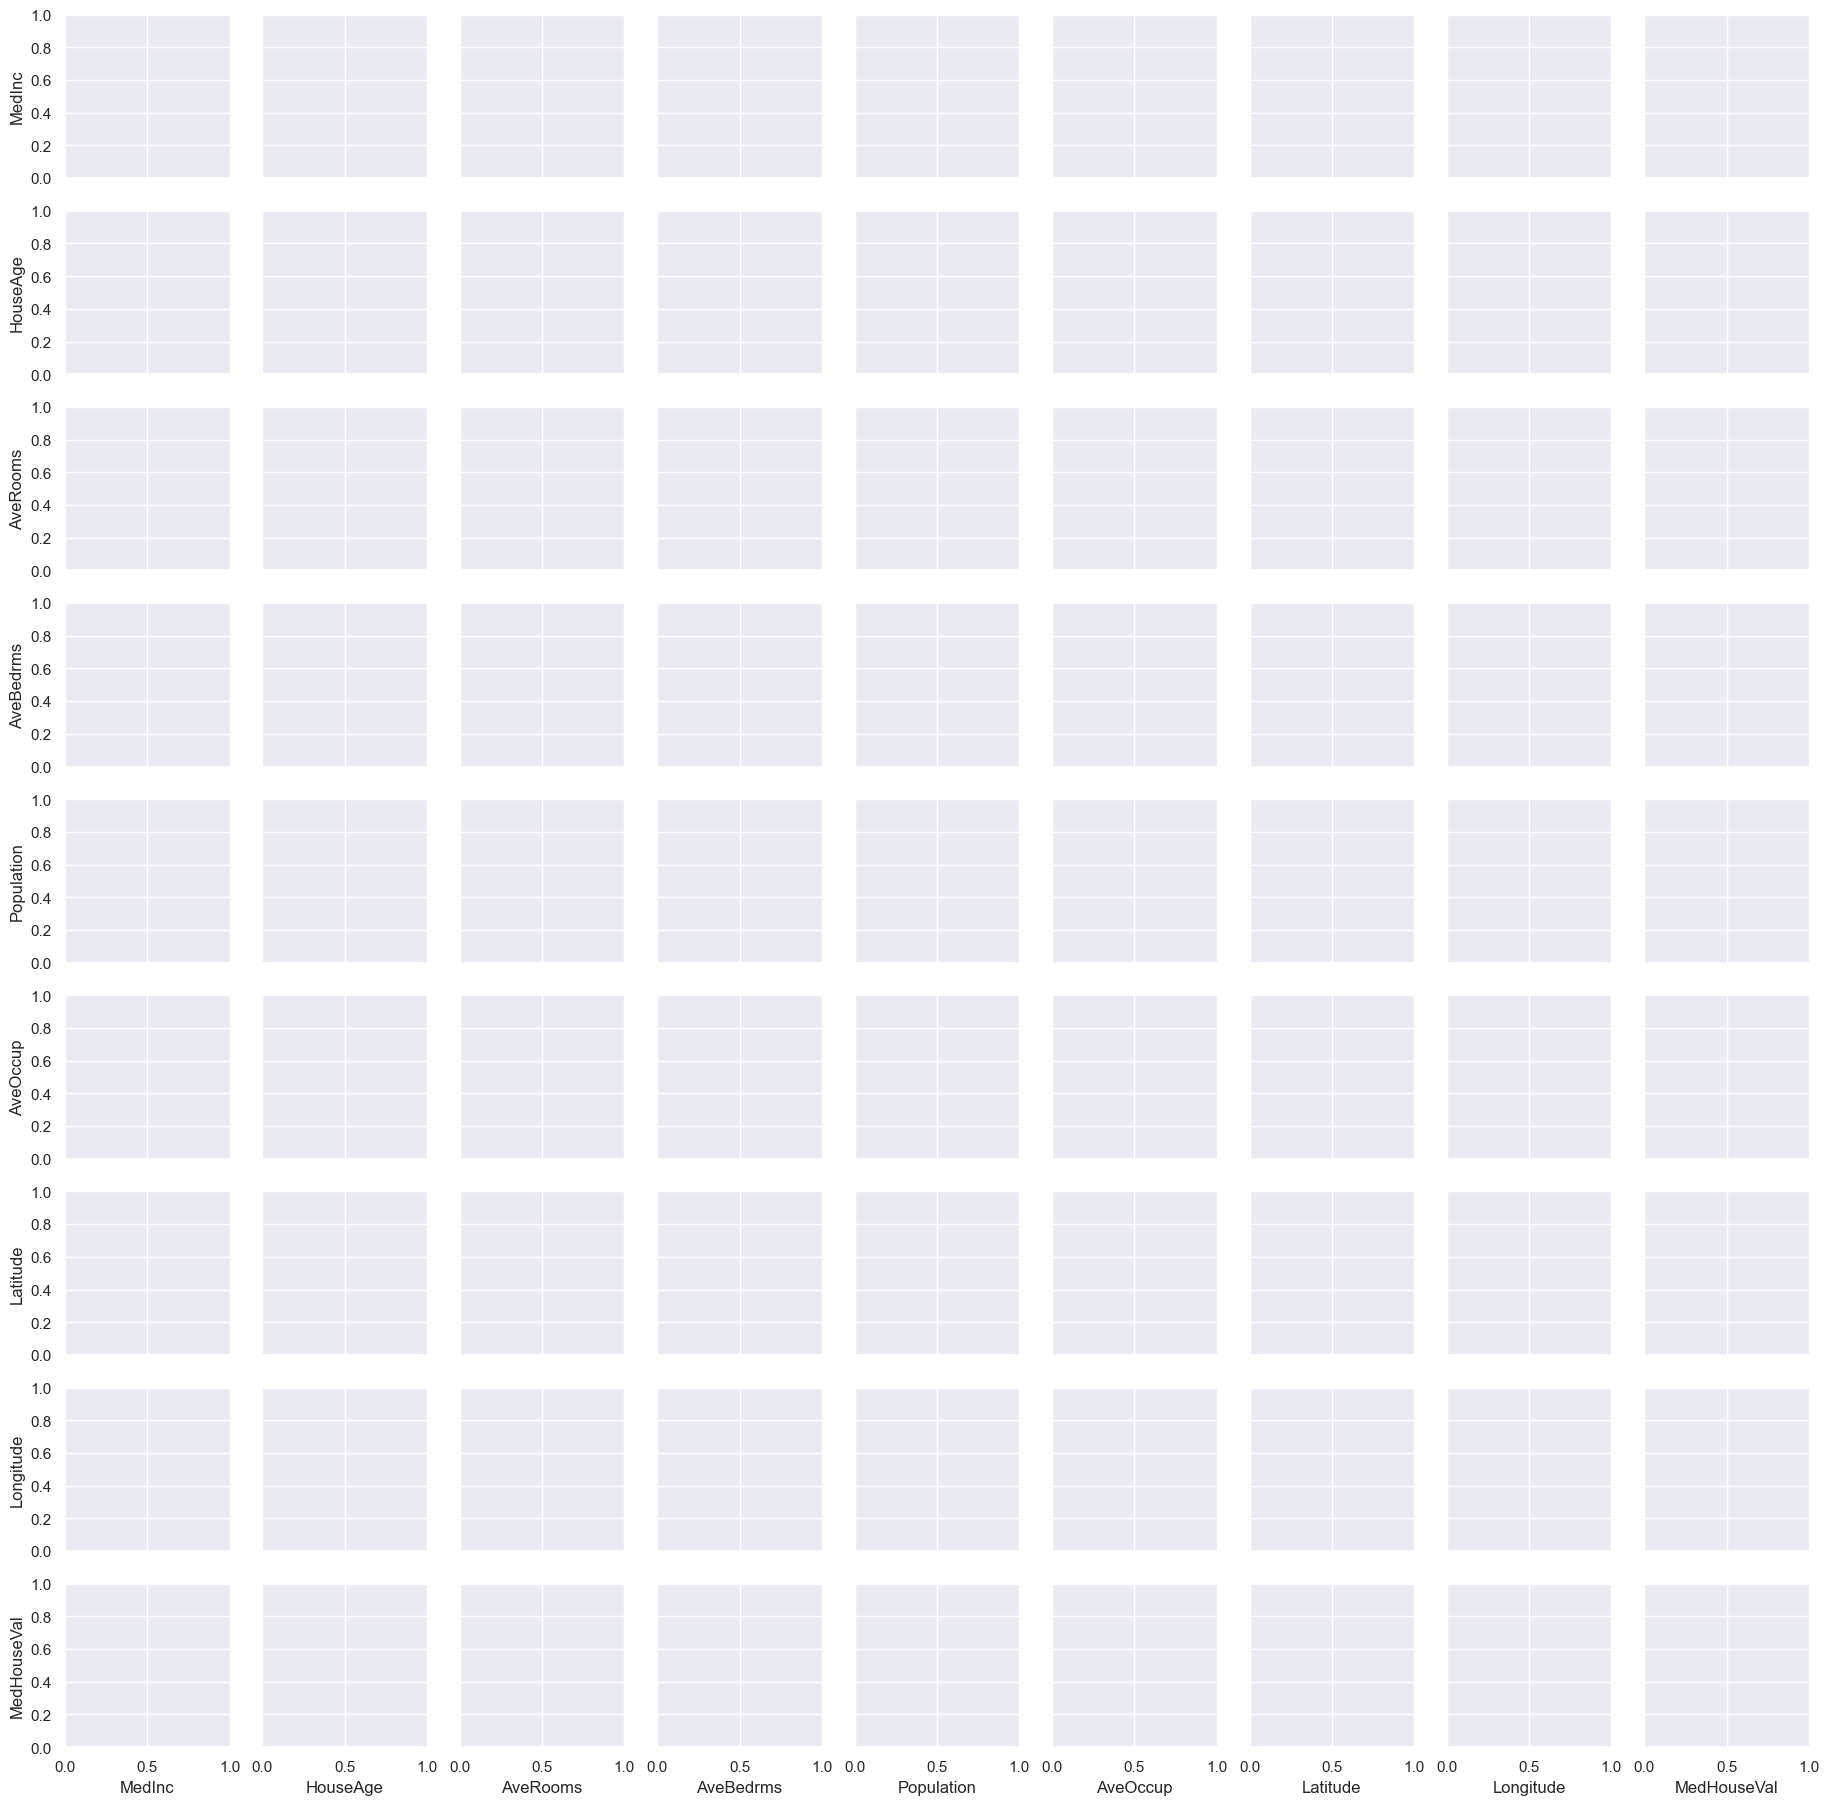

In [15]:
sns.pairplot(data=df);

Se separa el dataset en entrenamiento y evaluación

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.3, random_state=42)

In [ ]:
# Escalemos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lo transformemos en DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=california_housing['feature_names'])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=california_housing['feature_names'])

In [ ]:
X_train_scaled.head()

Aquí se muestra un ejemplo de validación cruzada.

- Usamos método de 5-folds
- Usamos el MSE. [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) usa el valor negativo por motivos de simplificar el funcionamiento de otras funciones de la libreria.

In [ ]:
# Creamos un modelo
alpha = 1.0
ridge_model = Ridge(alpha=alpha)

# Este la forma que se implementa en scikit-learn
cv = cross_val_score(ridge_model, X_train_scaled, y=y_train, scoring="neg_mean_squared_error", cv=5, n_jobs=-1)

# Este calculo nos devuelve el valor de MSE para cada una de los folds
cv

In [ ]:
# Podemos obtener el valor medio y desvio estandar de cada caso:
print(f"La media del MSE en 5-fold CV para la regresión Ridge con alpha={alpha} es {(-1)*cv.mean()}")
print(f"El desvío estándar del MSE en 5-fold CV para la regresión Ridge con alpha={alpha} es {cv.std()}")

In [ ]:
# Acá generamos varios valores de alpha para la búsqueda pedida en el TP.

In [ ]:
alpha_values = np.linspace(0, 12.5, 100)
alpha_values